In [1]:
from datasets import load_dataset
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = load_dataset("Tobi-Bueck/customer-support-tickets")["train"]
df = pd.DataFrame(dataset)

print(f"✅ Dataset loaded with {len(df)} records.")
print("Available columns:", list(df.columns))

✅ Dataset loaded with 61765 records.
Available columns: ['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language', 'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']


In [3]:
df = df[df["language"] == "en"]

df["ticket_text"] = df["subject"].fillna('') + " " + df["body"].fillna('')

df = df[["ticket_text", "priority"]]

df = df.dropna(subset=["priority"])
df = df[df["ticket_text"].str.strip() != ""]


In [4]:
print(f"✅ Cleaned dataset size: {len(df)} samples")
print("📋 Example rows:")
print(df.head(3))

✅ Cleaned dataset size: 28261 samples
📋 Example rows:
                                         ticket_text priority
1  Account Disruption Dear Customer Support Team,...     high
2  Query About Smart Home System Integration Feat...   medium
3  Inquiry Regarding Invoice Details Dear Custome...      low


In [5]:
print("\n🔹 Generating embeddings using SentenceTransformer...")
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df["ticket_text"].tolist(), show_progress_bar=True)


🔹 Generating embeddings using SentenceTransformer...


Batches:   0%|          | 0/884 [00:00<?, ?it/s]

In [6]:
print(f"✅ Embeddings generated with shape: {embeddings.shape}")

✅ Embeddings generated with shape: (28261, 384)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, df["priority"], test_size=0.2, random_state=42
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 22608, Testing samples: 5653


In [13]:
print("\n🔹 Training Logistic Regression classifier...")
clf = LogisticRegression()
clf.fit(X_train, y_train)



🔹 Training Logistic Regression classifier...


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
y_pred = clf.predict(X_test)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))




📊 Classification Report:

              precision    recall  f1-score   support

        high       0.53      0.54      0.53      2157
         low       0.49      0.09      0.16      1190
      medium       0.47      0.66      0.55      2306

    accuracy                           0.49      5653
   macro avg       0.49      0.43      0.41      5653
weighted avg       0.49      0.49      0.46      5653



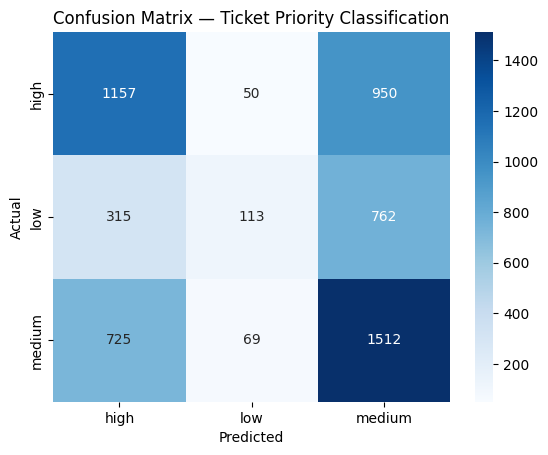

In [10]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix — Ticket Priority Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:

custom_text = "My payment failed twice and I cannot log in."

# Convert it to embedding and predict
custom_embedding = model.encode([custom_text])
predicted_priority = clf.predict(custom_embedding)[0]

print(f"📝 Ticket: {custom_text}")
print(f"🎯 Predicted Priority: {predicted_priority}")






📝 Ticket: My payment failed twice and I cannot log in.
🎯 Predicted Priority: high
